# Decision Tree

## Problem Statement

The dataset contains information about 3 brands namely US,Japan, Europe. Other parameters are mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year. The task is to find the brand of a car using these parameters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO
%matplotlib inline

## Dataset

In [2]:
car_data = pd.read_csv('cars.csv')
car_data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


## Data Analysis

In [3]:
car_data.shape

(261, 8)

* ### Checking Null Values

In [4]:
car_data.isnull().any()

mpg            False
cylinders      False
cubicinches    False
hp             False
weightlbs      False
time-to-60     False
year           False
brand          False
dtype: bool

**Inference** - None of the columns contain null values so there is no need to remove/replace data

In [5]:
car_data.dtypes

mpg            float64
cylinders        int64
cubicinches      int64
hp               int64
weightlbs        int64
time-to-60       int64
year             int64
brand           object
dtype: object

* ### Enconding Target Variable

In [6]:
lb = LabelEncoder()
lb.fit(car_data['brand'])
car_data['brand'] = lb.transform(car_data['brand'])

* ### Divide Feature and Target Variables

In [7]:
X = car_data.drop('brand', axis=1)
y = car_data['brand']

* ### Training and Testing

In [9]:
# Split the data into training and testing set
# 20 percent of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Decision Tree Training

The following parameters should be considered during training a decision tree:
- __criterion__: To measure quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
- __spliter__: Either 'best' to choose best split or 'random' to choose random best split. By default takes 'best' value.
- __max_features__: Number of features to consider.
- __max_depth__: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [10]:
dt_car = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=3, max_depth=3)
dt_car.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

## Visualizing Decision Tree

In [11]:
# Saving the dot file as it requires additional dependencies
# This file can be converted into png or jpg using any online converters

graph_data = open('graph.dot', 'w')
export_graphviz(dt_car, out_file=graph_data, filled=True, special_characters=True,
                feature_names=list(X_train.columns), class_names=list(lb.classes_), rounded=True)
graph_data.close()

![graphviz.png](graphviz.png)

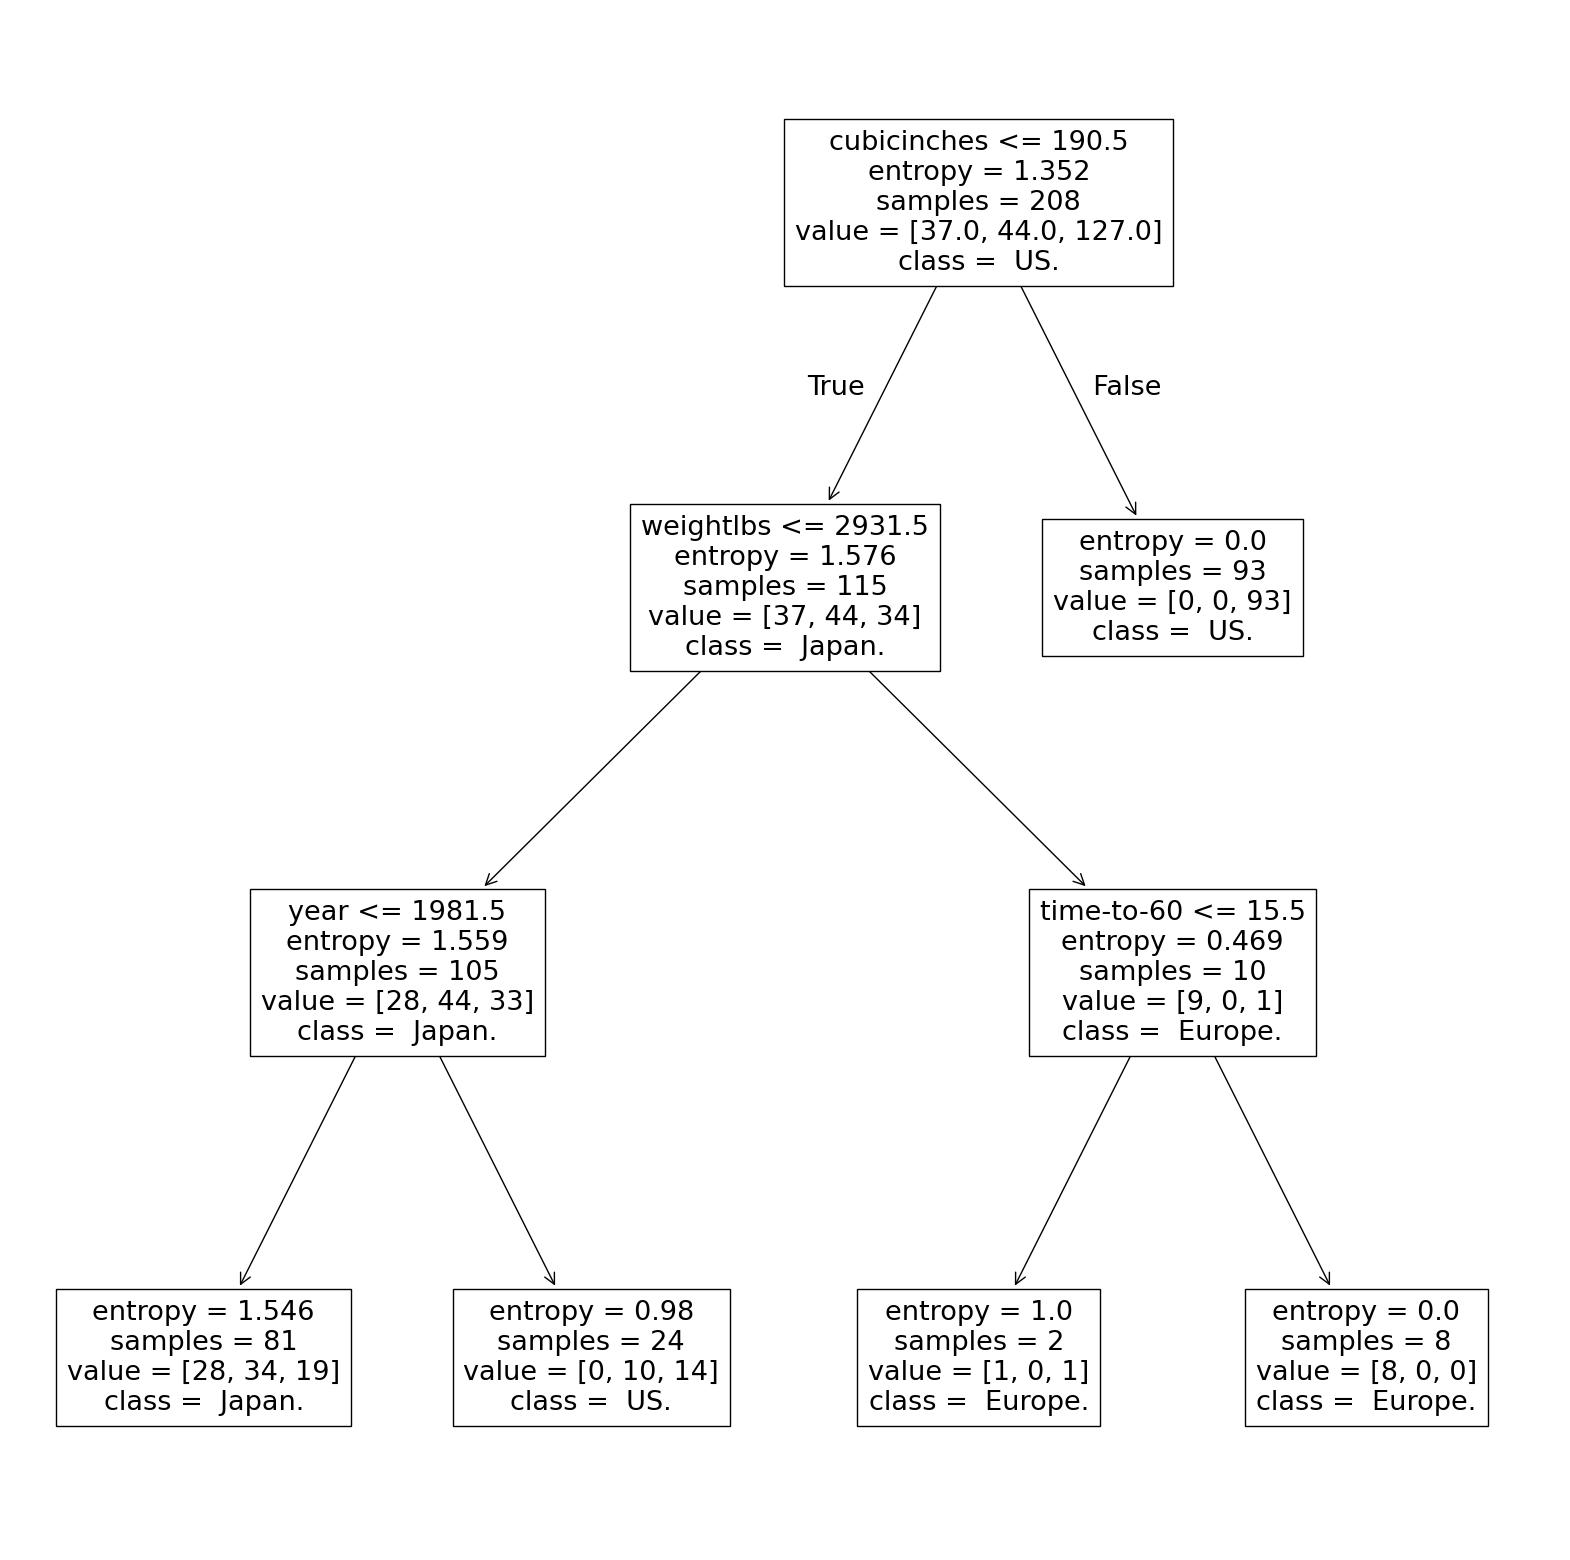

In [14]:
# Plot tree can also be used for visualizing the tree

plt.figure(figsize=(20,20))
plot_tree(dt_car, class_names=list(lb.classes_), feature_names=list(X_train.columns))
plt.show()

In [15]:
# Calculating accuracy

pred = dt_car.predict(X_test)
print('Accuracy is:', accuracy_score(y_test, pred))

Accuracy is: 0.6981132075471698


## Feature Importance

In [16]:
# Selecting only the important features

features = pd.DataFrame({'Features': X_train.columns, 'Importance': np.round(dt_car.feature_importances_,3)})
features = features.sort_values('Importance', ascending=False)

In [17]:
features

,Features,Importance
2,cubicinches,0.766
6,year,0.115
4,weightlbs,0.099
5,time-to-60,0.021
0,mpg,0.000
1,cylinders,0.000
3,hp,0.000


The above data shows which feature is important based on criterion provided

We can select the required important features and retrain the model

# Random Forest

The following parameters should be considered before using random forest classifier:
- __n_estimators__: Integer value to define number of trees in the forest.
- __criterion__: To measure quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [18]:
rf_car = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3)
rf_car.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

## Visualizing

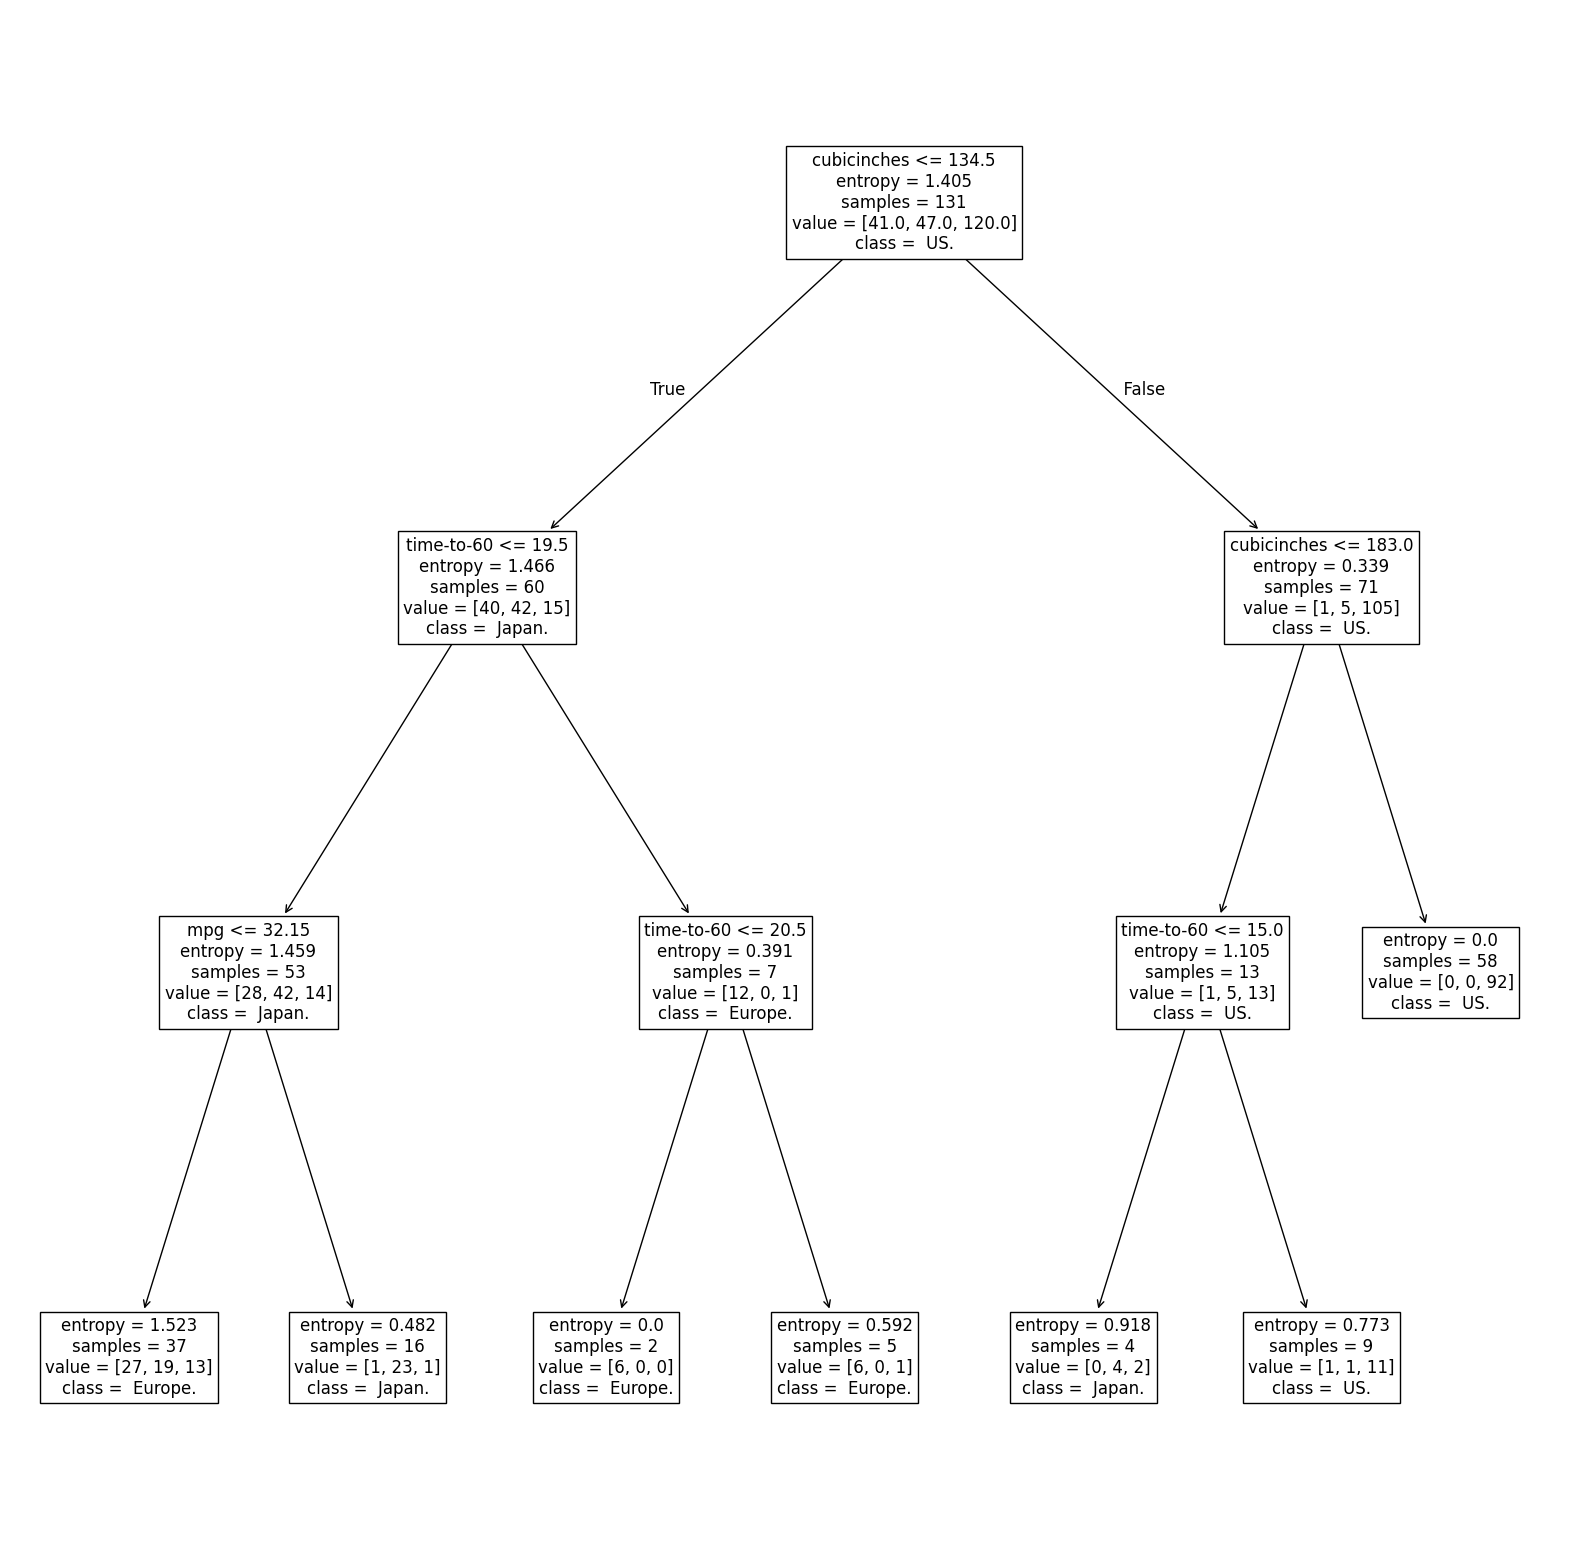

In [20]:
# Visualizing a single estimator

plt.figure(figsize=(20, 20))
plot_tree(rf_car.estimators_[5], feature_names=X_train.columns, class_names=(lb.classes_), fontsize=12)
plt.show()